In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
coordinates

[(42.69750046886878, 33.11072640790283),
 (-29.899641800324197, 75.04423887904014),
 (-67.30629401650503, 125.48283917024492),
 (-17.865601612204728, 150.6822018445318),
 (-64.2353212836183, 162.534484092279),
 (25.321483764019234, 151.72720585809094),
 (25.916963537089714, -53.2691782504768),
 (88.61346516478676, 160.56682177947488),
 (42.441733633958194, -147.37377729044618),
 (39.19476659839037, -60.664370619641474),
 (-27.21824932699692, 159.51430083778678),
 (-30.622559188776172, -87.58606439918988),
 (-12.784625879324608, 108.53904166168132),
 (19.532028766657703, 46.99916143794624),
 (62.425896713546564, -41.9695304172285),
 (-20.76682579884921, 178.7819763555259),
 (35.035728500573214, -1.1828406646845337),
 (-1.6753335782638885, -131.512502506141),
 (-19.867301336275688, -154.73058319619844),
 (-78.71937021589636, 43.785008928249084),
 (40.00338497251971, 34.276421499238836),
 (-55.657255178555616, 53.4640568410793),
 (43.43701079121857, -22.82161274192248),
 (-30.283144414348

In [5]:
from citipy import citipy

In [6]:
#Create a list for holding cities
cities = []
# Identify the nearst city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm suficcient count
len(cities)

610

In [7]:
cities

['kastamonu',
 'bambous virieux',
 'new norfolk',
 'bowen',
 'bluff',
 'katsuura',
 'codrington',
 'cherskiy',
 'kodiak',
 'halifax',
 'byron bay',
 'lebu',
 'srandakan',
 'najran',
 'nanortalik',
 'isangel',
 'wahran',
 'atuona',
 'avera',
 'port alfred',
 'sungurlu',
 'taolanaro',
 'rabo de peixe',
 'rikitea',
 'ushuaia',
 'kapaa',
 'puerto ayora',
 'cabedelo',
 'ancud',
 'arman',
 'khorramshahr',
 'saint-philippe',
 'jamestown',
 'longyearbyen',
 'sao filipe',
 'hilo',
 'kavieng',
 'albany',
 'provideniya',
 'sola',
 'busselton',
 'punta arenas',
 'kaeo',
 'cayenne',
 'mys shmidta',
 'souillac',
 'kapit',
 'castro',
 'saint-pierre',
 'umm lajj',
 'soria',
 'marsabit',
 'avarua',
 'benidorm',
 'meulaboh',
 'grindavik',
 'hermanus',
 'baft',
 'khatanga',
 'mahebourg',
 'farah',
 'barentsburg',
 'port elizabeth',
 'mar del plata',
 'sentyabrskiy',
 'cockburn town',
 'aksarka',
 'mayo',
 'illoqqortoormiut',
 'vaini',
 'nikolskoye',
 'darovskoy',
 'qaanaaq',
 'lorengau',
 'muroto',
 'bar

In [8]:
# Import requestes
import requests
# Import the API Key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid='+ weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=7d880ac315645e0386736d5ad7db6a46


In [10]:
#Import the datetime module from the datetime library
from datetime import datetime

In [11]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging.
print('Beginning Data Retrieval     ')
print('-----------------------------')

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ','+')
    
#Log the URL, record and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
# #Add one to the record_count
    record_count += 1
# #Run an API reqeust for each of the cities
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

            #Parse ou the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
            #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
            #Append the city information into city_data list
        city_data.append({'City': city.title(),
                              'Lat': city_lat,
                              'Lng': city_lng,
                              'Max Temp': city_max_temp,
                              'Humidity': city_humidity,
                              'Cloudiness': city_clouds,
                              'Wind Speed': city_wind,
                              'Country': city_country,
                              'Date': city_date})
# If an error is experienced, skip the city
    except:
        print('City not found.Skipping...')
        pass

#Indicate that Data Loading is complete
print('---------------------------')
print('Data Retrieval Complete    ')
print('---------------------------')
        
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kastamonu
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | bowen
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | katsuura
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | halifax
Processing Record 11 of Set 1 | byron bay
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | srandakan
Processing Record 14 of Set 1 | najran
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | wahran
City not found.Skipping...
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | avera
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | sungurlu
Processing Record 22 of Set 1 | taolanaro
City not found.Skippin

Processing Record 39 of Set 4 | makakilo city
Processing Record 40 of Set 4 | kungurtug
Processing Record 41 of Set 4 | ust-kuyga
Processing Record 42 of Set 4 | northam
Processing Record 43 of Set 4 | port hardy
Processing Record 44 of Set 4 | aksha
Processing Record 45 of Set 4 | port-gentil
Processing Record 46 of Set 4 | tibati
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | rivers
Processing Record 49 of Set 4 | ban tak
Processing Record 50 of Set 4 | caceres
Processing Record 1 of Set 5 | verkhnevilyuysk
Processing Record 2 of Set 5 | cap malheureux
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | tiksi
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | rawannawi
City not found.Skipping...
Processing Record 7 of Set 5 | valparaiso
Processing Record 8 of Set 5 | sapouy
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | ikongo
Processing Record 11 of Set 5 | carutapera
Processing Record 12

Processing Record 27 of Set 8 | greymouth
Processing Record 28 of Set 8 | east london
Processing Record 29 of Set 8 | skjervoy
Processing Record 30 of Set 8 | sambava
Processing Record 31 of Set 8 | labytnangi
Processing Record 32 of Set 8 | ust-ishim
Processing Record 33 of Set 8 | mengen
Processing Record 34 of Set 8 | vanimo
Processing Record 35 of Set 8 | tabiauea
City not found.Skipping...
Processing Record 36 of Set 8 | kyabe
Processing Record 37 of Set 8 | mkushi
Processing Record 38 of Set 8 | puerto gaitan
Processing Record 39 of Set 8 | naze
Processing Record 40 of Set 8 | sitka
Processing Record 41 of Set 8 | say
Processing Record 42 of Set 8 | tupik
Processing Record 43 of Set 8 | bayshore gardens
Processing Record 44 of Set 8 | beremend
Processing Record 45 of Set 8 | bouna
Processing Record 46 of Set 8 | saint-leu
Processing Record 47 of Set 8 | oranjemund
Processing Record 48 of Set 8 | kamina
Processing Record 49 of Set 8 | tagusao
Processing Record 50 of Set 8 | aquira

City not found.Skipping...
Processing Record 15 of Set 12 | vrangel
Processing Record 16 of Set 12 | dmitriyevka
Processing Record 17 of Set 12 | kijini
Processing Record 18 of Set 12 | pedernales
Processing Record 19 of Set 12 | baoning
Processing Record 20 of Set 12 | xichang
Processing Record 21 of Set 12 | diapaga
Processing Record 22 of Set 12 | pilot butte
Processing Record 23 of Set 12 | waupun
Processing Record 24 of Set 12 | soyo
Processing Record 25 of Set 12 | teluknaga
Processing Record 26 of Set 12 | dolores
Processing Record 27 of Set 12 | luleburgaz
Processing Record 28 of Set 12 | tazovskiy
Processing Record 29 of Set 12 | santa maria del oro
Processing Record 30 of Set 12 | losal
Processing Record 31 of Set 12 | yuncheng
Processing Record 32 of Set 12 | aktau
Processing Record 33 of Set 12 | viedma
Processing Record 34 of Set 12 | florianopolis
Processing Record 35 of Set 12 | kupino
Processing Record 36 of Set 12 | flin flon
Processing Record 37 of Set 12 | smirnykh
P

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kastamonu,41.50,33.67,29.25,96,0,1.41,TR,2020-11-27 03:58:11
1,Bambous Virieux,-20.34,57.76,79.00,73,20,12.75,MU,2020-11-27 03:58:11
2,New Norfolk,-42.78,147.06,81.00,26,54,5.99,AU,2020-11-27 03:58:11
3,Bowen,-20.02,148.23,87.80,52,46,16.11,AU,2020-11-27 03:58:11
4,Bluff,-46.60,168.33,54.00,68,59,15.99,NZ,2020-11-27 03:58:12
...,...,...,...,...,...,...,...,...,...
555,Poya,-21.35,165.15,80.01,56,1,12.95,NC,2020-11-27 03:59:31
556,Ylivieska,64.08,24.55,34.00,94,82,1.99,FI,2020-11-27 03:59:31
557,Talara,-4.58,-81.27,64.63,86,7,13.09,PE,2020-11-27 03:59:31
558,Kuching,1.55,110.33,80.60,88,75,5.82,MY,2020-11-27 03:58:22


In [13]:
# Rearrange columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kastamonu,TR,2020-11-27 03:58:11,41.50,33.67,29.25,96,0,1.41
1,Bambous Virieux,MU,2020-11-27 03:58:11,-20.34,57.76,79.00,73,20,12.75
2,New Norfolk,AU,2020-11-27 03:58:11,-42.78,147.06,81.00,26,54,5.99
3,Bowen,AU,2020-11-27 03:58:11,-20.02,148.23,87.80,52,46,16.11
4,Bluff,NZ,2020-11-27 03:58:12,-46.60,168.33,54.00,68,59,15.99
...,...,...,...,...,...,...,...,...,...
555,Poya,NC,2020-11-27 03:59:31,-21.35,165.15,80.01,56,1,12.95
556,Ylivieska,FI,2020-11-27 03:59:31,64.08,24.55,34.00,94,82,1.99
557,Talara,PE,2020-11-27 03:59:31,-4.58,-81.27,64.63,86,7,13.09
558,Kuching,MY,2020-11-27 03:58:22,1.55,110.33,80.60,88,75,5.82


In [14]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data inta a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant field from the DataFram for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

<function matplotlib.pyplot.show(close=None, block=None)>

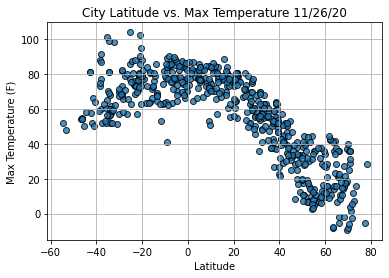

In [16]:
# Import time module
import time

#Build the scatter plot for latitude vs msx tempertaur
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

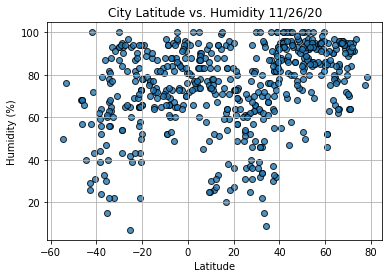

In [17]:
#Build the scatter plot for latitude vs humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

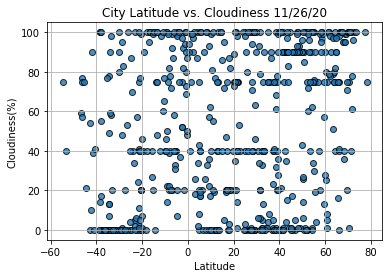

In [18]:
#Build the scatter plot for latitude vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

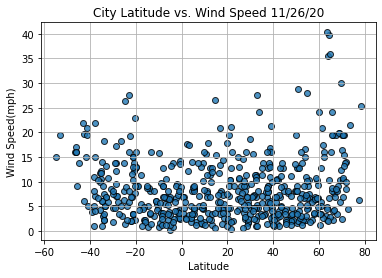

In [19]:
#Build the scatter plot for latitude vs wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show

In [20]:
# Import linregress
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    #Calculate teh regression line 'y_values' from the slope and intercept
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,'r')
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitutde')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Najran
Country                        SA
Date          2020-11-27 03:58:13
Lat                         17.49
Lng                         44.13
Max Temp                     60.8
Humidity                       38
Cloudiness                      0
Wind Speed                   1.36
Name: 13, dtype: object

In [23]:
city_data_df.loc[(city_data_df['Lat'] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kastamonu,TR,2020-11-27 03:58:11,41.50,33.67,29.25,96,0,1.41
5,Katsuura,JP,2020-11-27 03:58:12,35.13,140.30,57.99,76,75,11.41
7,Cherskiy,RU,2020-11-27 03:58:12,68.75,161.30,21.56,92,99,19.91
8,Kodiak,US,2020-11-27 03:58:12,57.79,-152.41,32.00,85,20,3.36
9,Halifax,CA,2020-11-27 03:57:20,44.65,-63.57,53.01,100,100,9.17
...,...,...,...,...,...,...,...,...,...
553,Qaqortoq,GL,2020-11-27 03:59:31,60.72,-46.03,15.80,52,1,3.36
554,Tombouctou,ML,2020-11-27 03:59:31,20.00,-3.00,65.46,27,73,7.43
556,Ylivieska,FI,2020-11-27 03:59:31,64.08,24.55,34.00,94,82,1.99
558,Kuching,MY,2020-11-27 03:58:22,1.55,110.33,80.60,88,75,5.82


In [24]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

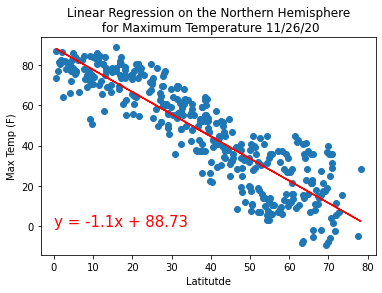

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Maximum Temperature ' + time.strftime('%x'), 'Max Temp (F)', (0,0))

In [26]:
linregress(x_values, y_values)

LinregressResult(slope=-1.1032836962704398, intercept=88.73150481833292, rvalue=-0.885743234596258, pvalue=1.0196358529355484e-125, stderr=0.030017508584095454)

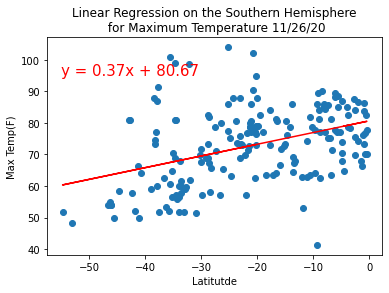

In [27]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the Function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Maximum Temperature ' + time.strftime('%x'), 'Max Temp(F)', (-55,95))

In [28]:
linregress(x_values, y_values)

LinregressResult(slope=0.37111833179725373, intercept=80.6715494635096, rvalue=0.4118282241998234, pvalue=4.74564057033843e-09, stderr=0.060374487339520465)

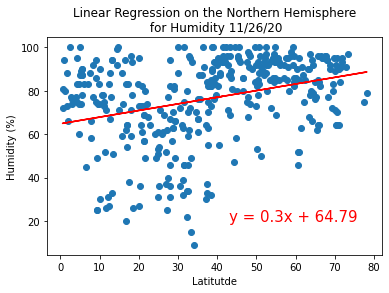

In [29]:
# Plot Plinear Regression for Humidity on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Humidity ' + time.strftime('%x'), 'Humidity (%)', (43,20))

In [30]:
linregress(x_values, y_values)

LinregressResult(slope=0.30484457054420244, intercept=64.787337656178, rvalue=0.3175943988254971, pvalue=3.4647736455665004e-10, stderr=0.04725315779579774)

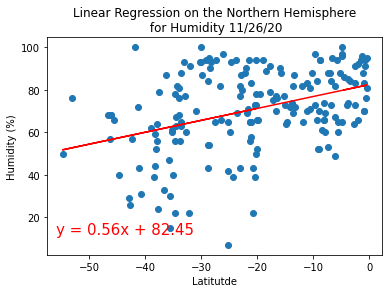

In [31]:
# Plot Plinear Regression for Humidity on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the Function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Humidity ' + time.strftime('%x'), 'Humidity (%)', (-56,12))

In [32]:
linregress(x_values, y_values)

LinregressResult(slope=0.5605398558814741, intercept=82.45041546245132, rvalue=0.3881916621142094, pvalue=4.027019678190934e-08, stderr=0.0978378367782971)

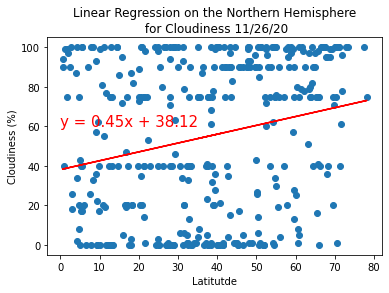

In [33]:
# Plot Plinear Regression for Cloudiness on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere\n for Cloudiness ' + time.strftime('%x'), 'Cloudiness (%)', (0,60))

In [34]:
linregress(x_values, y_values)

LinregressResult(slope=0.4470228705853651, intercept=38.12122470287659, rvalue=0.23592735249425312, pvalue=4.096837700489726e-06, stderr=0.09559348449307109)

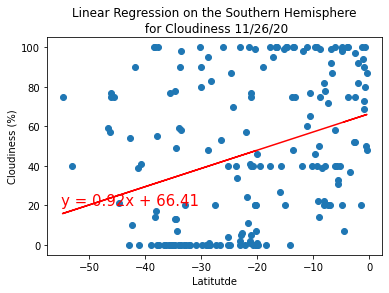

In [35]:
# Plot Plinear Regression for Cloudiness on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere\n for Cloudiness " + time.strftime('%x'), 'Cloudiness (%)', (-55,20))

In [36]:
linregress(x_values, y_values)

LinregressResult(slope=0.9225901914460092, intercept=66.40603790122398, rvalue=0.32473282829945005, pvalue=5.777464860789268e-06, stderr=0.19755987449625045)

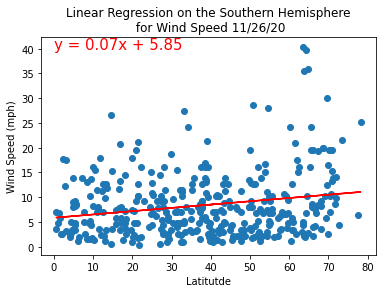

In [37]:
# Plot Plinear Regression for Wind Speed on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Wind Speed ' + time.strftime('%x'), 'Wind Speed (mph)', (0,40))

In [38]:
linregress(x_values, y_values)

LinregressResult(slope=0.06657039582236879, intercept=5.8470468521482815, rvalue=0.2077511710739759, pvalue=5.27553982512423e-05, stderr=0.01627309802313574)

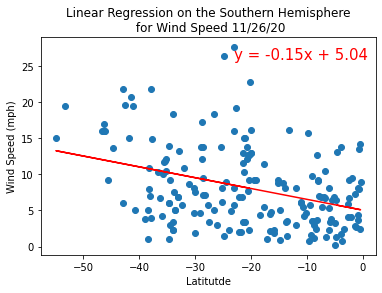

In [39]:
# Plot Plinear Regression for Wind Speed on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere\n for Wind Speed ' + time.strftime('%x'), 'Wind Speed (mph)', (-23
,26))

In [40]:
linregress(x_values, y_values)

LinregressResult(slope=-0.1505204658466783, intercept=5.036116879877708, rvalue=-0.36168640744824654, pvalue=3.655570709241161e-07, stderr=0.02852548907170813)